In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load your dataset
data = pd.read_csv('Churn_Modelling.csv')

# Step 1: Remove unnecessary columns
data_cleaned = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Step 2: Convert categorical variables into dummy/indicator variables
data_cleaned = pd.get_dummies(data_cleaned, columns=['Geography', 'Gender'], drop_first=True)

# Step 3: Normalize/Standardize continuous variables
scaler = StandardScaler()
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data_cleaned[columns_to_scale] = scaler.fit_transform(data_cleaned[columns_to_scale])

# Check the first few rows of the processed data
data_cleaned.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,False,False,False
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,True,False
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,False,False,False
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,False,False,False
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,True,False


In [ ]:
# Assuming data is loaded and cleaned as per previous steps
data = pd.read_csv('Churn_Modelling.csv')
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
scaler = StandardScaler()
data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

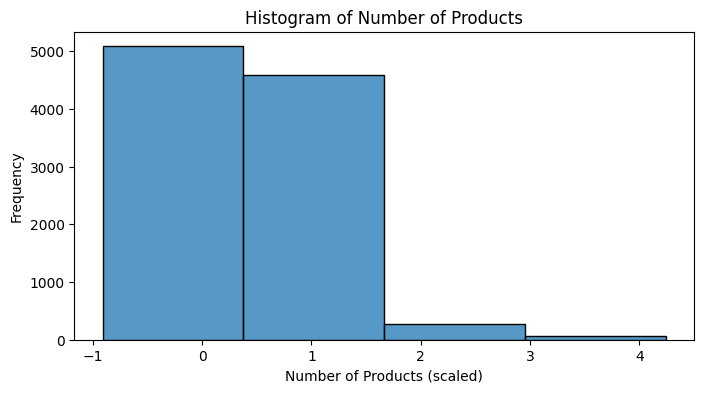

In [ ]:
# 1. Histogram of Number of Products
plt.figure(figsize=(8, 4))
sns.histplot(data['NumOfProducts'], kde=False, bins=4)
plt.title('Histogram of Number of Products')
plt.xlabel('Number of Products (scaled)')
plt.ylabel('Frequency')
plt.show()

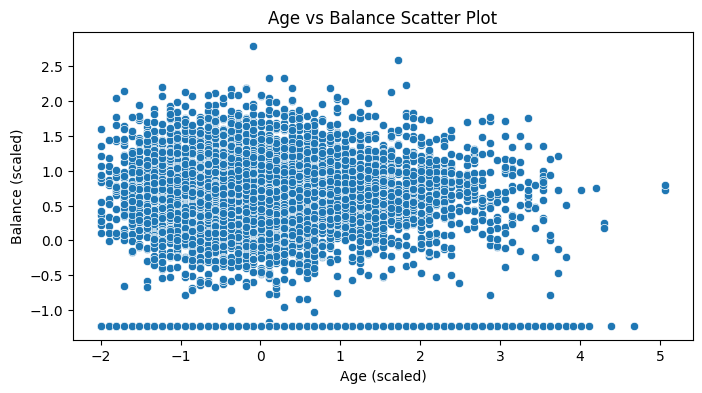

In [ ]:
# 2. Scatter Plot of Age vs Balance
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Age', y='Balance', data=data)
plt.title('Age vs Balance Scatter Plot')
plt.xlabel('Age (scaled)')
plt.ylabel('Balance (scaled)')
plt.show()

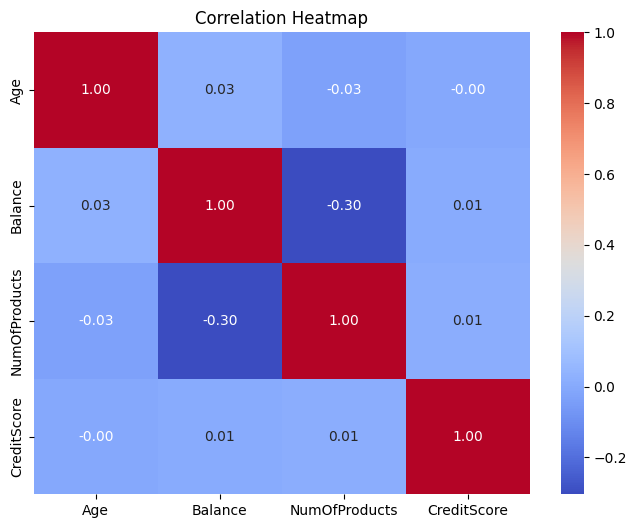

In [ ]:
# 3. Heatmap of correlation matrix to simulate a complex statistical graph
correlation_matrix = data[['Age', 'Balance', 'NumOfProducts', 'CreditScore']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##Clusterning

In [ ]:
# 4. Elbow Method Plot for Clustering Analysis
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data[['Age', 'Balance']])
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

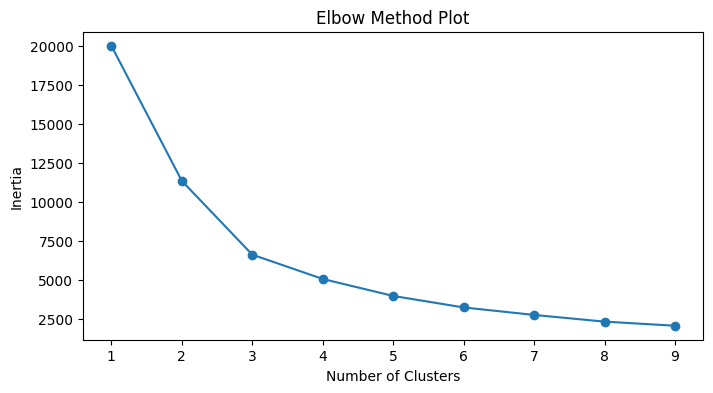

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# 5.Silhouette Score Plot
sil_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    preds = kmeans.fit_predict(data[['Age', 'Balance']])
    score = silhouette_score(data[['Age', 'Balance']], preds)
    sil_scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

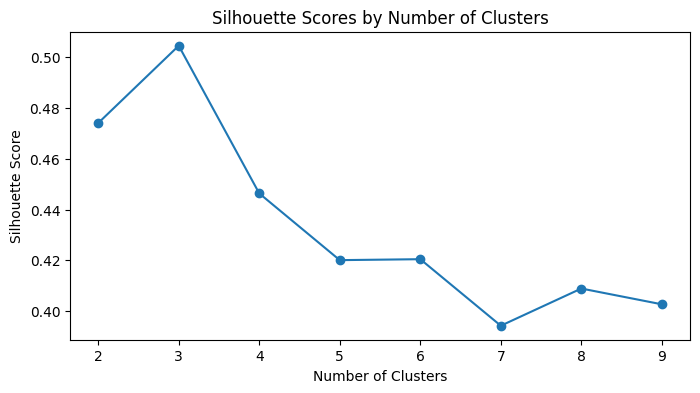

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), sil_scores, marker='o')
plt.title('Silhouette Scores by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

##Fitting

In [ ]:
# Load and prepare the dataset
data = pd.read_csv('Churn_Modelling.csv')
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Normalize numerical fields
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

In [ ]:
# Linear Regression to predict 'Balance'
X = data[['Age', 'CreditScore']]  # Independent variables
y = data['Balance']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

RMSE for Linear Regression: 0.9876227913809601


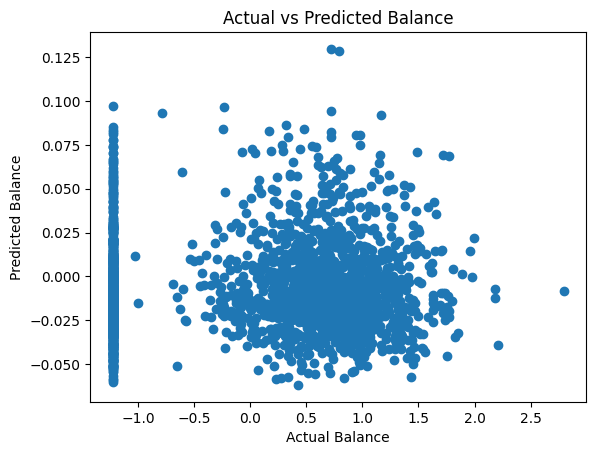

In [ ]:
# Calculate RMSE for the linear model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE for Linear Regression:", rmse)

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Balance')
plt.ylabel('Predicted Balance')
plt.title('Actual vs Predicted Balance')
plt.show()

In [ ]:
# Logistic Regression to predict 'Exited' status
X = data.drop('Exited', axis=1)  # use all other features for prediction
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

In [ ]:
# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Logistic Regression:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy for Logistic Regression: 0.811
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000



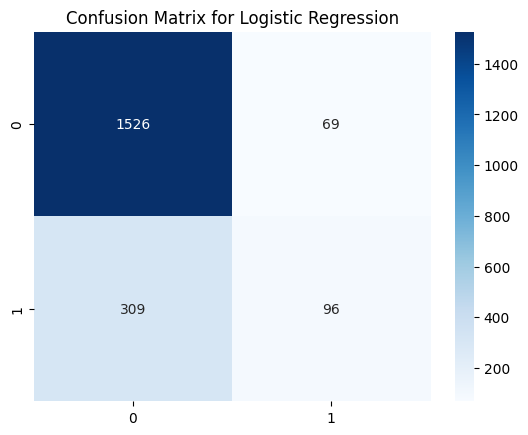

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')

plt.show()